In [5]:
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import sys
curPath = os.path.abspath(os.path.dirname('__file__'))
rootPath = os.path.split(curPath)[0]
sys.path.append(os.path.split(rootPath)[0])
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # Mac下使用
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


from loans_drop.config.path import data_path,config_path
from loans_drop.config.feature import *
from loans_drop.data_cleaning.decode_field import cat_replace
from loans_drop.config.feature import category_columns

sys.path

['/Users/luocheng/anaconda3/lib/python36.zip',
 '/Users/luocheng/anaconda3/lib/python3.6',
 '/Users/luocheng/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/luocheng/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/luocheng/.ipython',
 '/Users/luocheng/Documents/dgg/bss-recommended-platform',
 '/Users/luocheng/Documents/dgg/bss-recommended-platform',
 '/Users/luocheng/Documents/dgg/bss-recommended-platform']

In [6]:
df = pd.read_csv(data_path + 'total_data20190711.csv',encoding = 'utf-8')

print(df.shape)
print(df.info())

df.head()

(160316, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 78 columns):
login_name                    160316 non-null int64
customer_id                   160316 non-null int64
product_amount                9729 non-null float64
followStart                   156022 non-null object
followEnd                     64854 non-null object
content                       156022 non-null object
salary_score                  156022 non-null float64
avgAddWechatFriendCount       158808 non-null float64
avgCallCount                  159549 non-null float64
avgIntentCustomerCount        126118 non-null float64
avgRemarkWords                159953 non-null float64
avgSignBillDays               79442 non-null float64
avgToDoorCount                149211 non-null float64
avgWorkHour                   159790 non-null float64
behaviorScore                 160181 non-null float64
loanRate                      150290 non-null float64
performanceRank        

,login_name,customer_id,product_amount,followStart,followEnd,content,salary_score,avgAddWechatFriendCount,avgCallCount,avgIntentCustomerCount,avgRemarkWords,avgSignBillDays,avgToDoorCount,avgWorkHour,behaviorScore,loanRate,performanceRank,signBillCount,signBillRate,toDoorRate,age,locked,post,rank,sex,work_age,average_performance_amount,average_profit_amount,average_internal_cost,average_external_cost,average_payment_amount,average_business_amount,average_cost_price,average_CALL_0940_1040,average_CALL_1100_1200,average_CALL_1400_1500,average_CALL_1520_1620,average_achievement,average_profit,average_internal_cost_orf,average_external_cost_orf,average_assist_achievement,average_assist_profit,orderAmount,meetingCount,orderCount,tccs,flagContent,flagRemark,mon,remarkType,times,addTypeCode,allotNumber,businessLocation,businessOperate,businessStage,businessStatus,extensionCode,followTimes,invalidNumber,isCost,isMind,lastLoseType,opportunitytypeCode,originCode,originType,placeCode,referral,uploadType,vip,wayCode,widelyType,coverCharge,refundOrderSign,signOderNum,callTimes,avgCallDuration
0,60432713,7807155386380238848,3000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,3000.0,1.0,1.0,NaN,0.0,0.960000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_1,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,33.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,dhtg,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,13.0,112.54
1,60432713,7814945782437298176,6000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,6000.0,1.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,15.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,3.0,106.00
2,60432713,7786526945294073856,1000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,1000.0,1.0,1.0,NaN,0.0,0.947368,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_7,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,CBJSFS_NO,0.0,NaN,BUS_OPP_5,BUS_LYQD_805,ORIGIN_TYPE_8,BUS_SOR_PLACE_BJ,1.0,2.0,0.0,BUS_WAY_CODE_1,0.0,500.0,0.0,NaN,10.0,124.90
3,60432713,7813284180585005056,12000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,12000.0,1.0,1.0,NaN,0.0,0.888889,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,BUS_LYQD_707,ORIGIN_TYPE_1,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,15.0,89.13
4,60432713,7816475258165575680,30000.0,2019-05-14 11:05:50,NaN,自动分配商机给【宋纯翎60432713】,0.0,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,30000.0,2.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_4,NaN,BUS_STA_2_3,NaN,8.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,4.0,76.25


In [7]:
def get_label(x):
    if x >= 0:
        return 1
    else:
        return 0
    
df['label']= df['product_amount'].apply(lambda x: get_label(x))
print(df.shape)
print(df.info())
print(df['label'].value_counts())
df.head()

(160316, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 79 columns):
login_name                    160316 non-null int64
customer_id                   160316 non-null int64
product_amount                9729 non-null float64
followStart                   156022 non-null object
followEnd                     64854 non-null object
content                       156022 non-null object
salary_score                  156022 non-null float64
avgAddWechatFriendCount       158808 non-null float64
avgCallCount                  159549 non-null float64
avgIntentCustomerCount        126118 non-null float64
avgRemarkWords                159953 non-null float64
avgSignBillDays               79442 non-null float64
avgToDoorCount                149211 non-null float64
avgWorkHour                   159790 non-null float64
behaviorScore                 160181 non-null float64
loanRate                      150290 non-null float64
performanceRank        

,login_name,customer_id,product_amount,followStart,followEnd,content,salary_score,avgAddWechatFriendCount,avgCallCount,avgIntentCustomerCount,avgRemarkWords,avgSignBillDays,avgToDoorCount,avgWorkHour,behaviorScore,loanRate,performanceRank,signBillCount,signBillRate,toDoorRate,age,locked,post,rank,sex,work_age,average_performance_amount,average_profit_amount,average_internal_cost,average_external_cost,average_payment_amount,average_business_amount,average_cost_price,average_CALL_0940_1040,average_CALL_1100_1200,average_CALL_1400_1500,average_CALL_1520_1620,average_achievement,average_profit,average_internal_cost_orf,average_external_cost_orf,average_assist_achievement,average_assist_profit,orderAmount,meetingCount,orderCount,tccs,flagContent,flagRemark,mon,remarkType,times,addTypeCode,allotNumber,businessLocation,businessOperate,businessStage,businessStatus,extensionCode,followTimes,invalidNumber,isCost,isMind,lastLoseType,opportunitytypeCode,originCode,originType,placeCode,referral,uploadType,vip,wayCode,widelyType,coverCharge,refundOrderSign,signOderNum,callTimes,avgCallDuration,label
0,60432713,7807155386380238848,3000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,3000.0,1.0,1.0,NaN,0.0,0.960000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_1,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,33.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,dhtg,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,13.0,112.54,1
1,60432713,7814945782437298176,6000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,6000.0,1.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,15.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,3.0,106.00,1
2,60432713,7786526945294073856,1000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,1000.0,1.0,1.0,NaN,0.0,0.947368,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_7,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,CBJSFS_NO,0.0,NaN,BUS_OPP_5,BUS_LYQD_805,ORIGIN_TYPE_8,BUS_SOR_PLACE_BJ,1.0,2.0,0.0,BUS_WAY_CODE_1,0.0,500.0,0.0,NaN,10.0,124.90,1
3,60432713,7813284180585005056,12000.0,NaN,NaN,NaN,NaN,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,12000.0,1.0,1.0,NaN,0.0,0.888889,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_3,NaN,BUS_STA_2_3,NaN,21.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,BUS_LYQD_707,ORIGIN_TYPE_1,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_4,0.0,NaN,0.0,NaN,15.0,89.13,1
4,60432713,7816475258165575680,30000.0,2019-05-14 11:05:50,NaN,自动分配商机给【宋纯翎60432713】,0.0,25.4,33.0,0.08,64.57,30.0,1.12,8.99,100.0,0.0364,0.264045,26.0,0.1165,0.66,20.0,0.0,商务顾问,P,1.0,15.0,2498.041667,2078.5625,436.34375,46.875,2647.46875,3172.291667,38.791667,5.920949,4.237154,5.146245,4.482213,475.725464,401.371353,74.354111,3.97878,NaN,NaN,30000.0,2.0,1.0,NaN,0.0,0.750000,NaN,NaN,NaN,BUS_ADD_TYPE_CODE_3,1.0,emp,BUS_4,NaN,BUS_STA_2_3,NaN,8.0,0.0,JSCB,0.0,NaN,BUS_OPP_1,gdt,ORIGIN_TYPE_4,BUS_SOR_PLACE_BJ,0.0,2.0,0.0,BUS_WAY_CODE_1,0.0,NaN,0.0,NaN,4.0,76.25,1


In [8]:
df = df[list(set(category_columns+['login_name','customer_id','label']))]
print(df.shape)
print(df.info())
print(df['label'].value_counts())
df = cat_replace(df)
df.head()

(160316, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160316 entries, 0 to 160315
Data columns (total 26 columns):
sex                    153984 non-null float64
addTypeCode            106506 non-null object
businessStage          3570 non-null object
remarkType             7194 non-null object
locked                 153984 non-null float64
login_name             160316 non-null int64
isCost                 102816 non-null object
opportunitytypeCode    106506 non-null object
businessStatus         106506 non-null object
refundOrderSign        33452 non-null float64
placeCode              106506 non-null object
vip                    106482 non-null float64
rank                   153984 non-null object
isMind                 106463 non-null float64
extensionCode          2025 non-null object
businessOperate        106506 non-null object
label                  160316 non-null int64
referral               106463 non-null float64
uploadType             106491 non-null float64
orig


{'ORIGIN_TYPE_4': '2类', 'ORIGIN_TYPE_8': '转介绍', 'ORIGIN_TYPE_1': '3类', '其他': '其他', 'ORIGIN_TYPE_3': '5类', 'ORIGIN_TYPE_9': '平台和营运', 'ORIGIN_TYPE_6': '自开发', 'ORIGIN_TYPE_5': '4类', 'ORIGIN_TYPE_11': '网推3类', 'ORIGIN_TYPE_10': '网推2类', 'ORIGIN_TYPE_13': '网推5类', 'ORIGIN_TYPE_12': '网推4类', 'ORIGIN_TYPE_2': '1类', '公共字典': '公共字典', 'ORIGIN_TYPE_21': '顶峰', 'ORIGIN_TYPE_22': '小顶金融', 'ORIGIN_TYPE_7': '拾回', 'ORIGIN_TYPE_19': '知易声', '自开发': '自开发', '表单': '表单'}
2类       37640
3类       18079
自开发      16192
网推2类     13892
网推3类      6562
4类        3759
平台和营运     2587
5类        2279
其他        2106
转介绍       1287
网推4类       804
网推5类       682
顶峰         188
公共字典       149
1类         127
拾回         127
小顶金融        44
表单           1
知易声          1
Name: originType, dtype: int64

{'BUS_SOR_PLACE_BJ': '朝阳', 'BUS_SOR_PLACE_CD': '成都', 'BUS_SOR_PLACE_BJ_HD': '海淀', 'BUS_SOR_PLACE_WH': '武汉', 'BUS_SOR_PLACE_CQ': '重庆', 'BUS_SOR_PLACE_GZ': '广州', 'BUS_SOR_PLACE_SH': '上海', 'BUS_SOR_PLACE_HZ': '杭州', 'BUS_SOR_PLACE_FS': '佛山'

,sex,addTypeCode,businessStage,remarkType,locked,login_name,isCost,opportunitytypeCode,businessStatus,refundOrderSign,placeCode,vip,rank,isMind,extensionCode,businessOperate,label,referral,uploadType,originType,widelyType,customer_id,wayCode,lastLoseType,originCode,businessLocation
0,1.0,网运,NaN,NaN,0.0,60432713,计算成本,公司商机,已签单,0.0,朝阳,0.0,P,0.0,NaN,跟进,1,0.0,2.0,2类,0.0,7807155386380238848,抢单,NaN,电话推广,个人库
1,1.0,新媒体,NaN,NaN,0.0,60432713,计算成本,公司商机,已签单,0.0,朝阳,0.0,P,0.0,NaN,跟进,1,0.0,2.0,2类,0.0,7814945782437298176,资源端分配,NaN,广点通,个人库
2,1.0,转介绍,NaN,NaN,0.0,60432713,不计算,转介绍,已签单,0.0,朝阳,0.0,P,0.0,NaN,跟进,1,1.0,2.0,转介绍,0.0,7786526945294073856,资源端分配,NaN,转介绍,个人库
3,1.0,新媒体,NaN,NaN,0.0,60432713,计算成本,公司商机,已签单,0.0,朝阳,0.0,P,0.0,NaN,跟进,1,0.0,2.0,3类,0.0,7813284180585005056,抢单,NaN,新媒体,个人库
4,1.0,新媒体,NaN,NaN,0.0,60432713,计算成本,公司商机,已签单,0.0,朝阳,0.0,P,0.0,NaN,签单,1,0.0,2.0,2类,0.0,7816475258165575680,资源端分配,NaN,广点通,个人库


/Users/luocheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/luocheng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/luocheng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/luocheng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12568b048>,
      dtype=object)

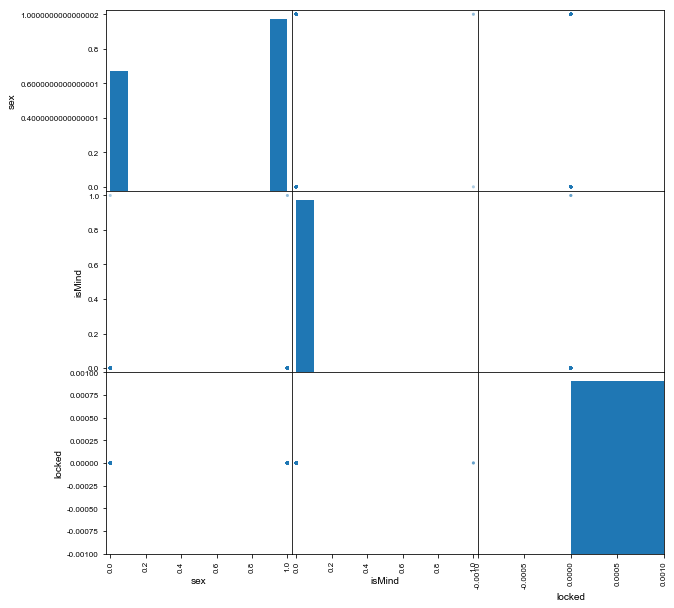

In [9]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

fig,ax = plt.subplots(figsize=(10,10))
scatter_matrix(df[['sex','isMind','locked']],alpha = 0.2, diagonal='hist', ax=ax)

# 删除缺失值

In [10]:
# 离散型变量,如果某一取值的数量超过了95%，则舍弃该变量
remove = set()
print(df.shape)
print('处理类别型变量')
for name in df.columns:
    if name in ['login_name','customer_id','label']:
        continue
        
    counts = df[name].value_counts()
    num = sum(counts)
    for v in counts:
        if v/num>=0.80:
#             print(k)
#             print(counts)
            remove.add(name)
    

ss = df.isnull().sum() / len(df)
for i in range(len(ss)):   
    print(ss.index[i],ss[i])
    if ss[i] > 0.5:
        remove.add(ss.index[i])

remove = list(remove)
df.drop(columns = remove, axis = 1, inplace=True)
print(df.shape)
df.head()

(160316, 26)
处理类别型变量
sex 0.03949699343796003
addTypeCode 0.33564959205569
businessStage 0.9777314803263555
remarkType 0.9551261259013448
locked 0.03949699343796003
login_name 0.0
isCost 0.3586666333990369
opportunitytypeCode 0.33564959205569
businessStatus 0.33564959205569
refundOrderSign 0.7913371092093117
placeCode 0.33564959205569
vip 0.33579929638963046
rank 0.03949699343796003
isMind 0.3359178123206667
extensionCode 0.987368696823773
businessOperate 0.33564959205569
label 0.0
referral 0.3359178123206667
uploadType 0.3357431572644028
originType 0.33564959205569
widelyType 0.34072082636792334
customer_id 0.0
wayCode 0.33565582973627084
lastLoseType 0.5744280046907358
originCode 0.33566206741685173
businessLocation 0.33564959205569
(160316, 15)


,sex,addTypeCode,login_name,isCost,opportunitytypeCode,businessStatus,placeCode,businessOperate,label,uploadType,originType,customer_id,wayCode,originCode,businessLocation
0,1.0,网运,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,2类,7807155386380238848,抢单,电话推广,个人库
1,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,2类,7814945782437298176,资源端分配,广点通,个人库
2,1.0,转介绍,60432713,不计算,转介绍,已签单,朝阳,跟进,1,2.0,转介绍,7786526945294073856,资源端分配,转介绍,个人库
3,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,3类,7813284180585005056,抢单,新媒体,个人库
4,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,签单,1,2.0,2类,7816475258165575680,资源端分配,广点通,个人库


In [11]:
print(df.shape)
print(df['label'].value_counts())
df.dropna(axis=0, thresh=3, inplace=True)
print(df.shape)
print(df['label'].value_counts())

(160316, 15)
0    150587
1      9729
Name: label, dtype: int64
(160316, 15)
0    150587
1      9729
Name: label, dtype: int64


# 对df['originCode']取值进行分类

In [12]:
df['originCode'].value_counts().index.tolist()

['新媒体',
 '广点通',
 '新媒体事业部(已禁用)',
 '网推',
 '今日头条',
 '自开发',
 '线索转化',
 '百度移动',
 'SEM竞价推广',
 '资源推广事业部(已禁用)',
 '电话推广',
 '转介绍',
 '神马',
 '无法确定（已禁用）',
 '电话推广1',
 '营运在线咨询',
 '其它（已禁用）',
 '百度移动（已禁用）',
 '营运自开发',
 '商务自开发',
 '网推融资电话',
 '搜狗移动',
 '自主开发资源（已禁用）',
 '营运电话咨询',
 '电话推广2',
 '营运360',
 'CPA',
 '百度PC（已禁用）',
 '百度PC',
 '自开发（禁）',
 '小顶网网络咨询（已禁用）',
 '小顶金融',
 '广泛资源（已禁用）',
 '在线咨询（禁）',
 '营运表单',
 '电话咨询（禁）',
 'BUS_LYQD_DSFQD',
 '自主开发其它（已禁用）',
 '百度pc',
 '电台其他（已禁用）',
 '【成都】电台101.7（已禁用）',
 '非竞价推广（禁）',
 '58同城（已禁用）',
 'SEM推广（已禁用）',
 'BUS_LYQD_1360',
 '自开发（已禁用）',
 '【成都】电台90.0（已禁用）',
 '电话咨询（已禁用）',
 '其他',
 '360PC',
 '其他渠道',
 '广泛资源开发（已禁用）',
 '重庆电台88.1',
 '神马（已禁用）',
 '360移动',
 '商务二次自开发',
 '360pc',
 '集团微信（已禁用）',
 '网络推广（已禁用）',
 '电台访谈101.7（已禁用）',
 '360PC（已禁用）',
 '成都地铁',
 '营运第三方渠道',
 '今日头条（已禁用）',
 '【成都】地铁视频1/2/3/4号（已禁用）',
 '其他（禁）',
 '流转库资源开发（已禁用）',
 '搜狗PC',
 '表单导入（禁）',
 '搜狗移动（已禁用）',
 'BUS_LYQD_99',
 '电梯视频（已禁用）',
 '搜狗pc',
 '搜狗PC（已禁用）',
 '朋友介绍（已禁用）',
 '重庆电台95.5',
 '营运其他',
 '小顶网电话咨询（已禁用）',
 '重庆电台93.8',
 '电台访谈90.0（已禁用）',
 '无

In [13]:
dic = {}
for value in df['originCode'].value_counts().index.tolist():
    if '禁' in value:
        dic[value] = '已禁用'
    if '自开发' in value:
        dic[value] = '自开发'
    if '网推' in value:
        dic[value] = '网推'
    if '电话' in value:
        dic[value] = '电话'
    if '电台' in value:
        dic[value] = '其他'
    if '电梯' in value:
        dic[value] = '其他'
    if '地铁' in value:
        dic[value] = '其他'
    if '轻轨' in value:
        dic[value] = '其他'
    if '自媒体' in value:
        dic[value] = '其他'
    if '今日头条' in value:
        dic[value] = 'BAT'
    if '百度' in value:
        dic[value] = 'BAT'
    if '360' in value:
        dic[value] = 'BAT'
    if '朋友圈' in value:
        dic[value] = 'BAT'
    if '搜狐' in value:
        dic[value] = 'BAT'
    if '网易' in value:
        dic[value] = 'BAT'
    if '搜狗' in value:
        dic[value] = 'BAT'
    if '万能钥匙' in value:
        dic[value] = 'BAT'
    if '其他' in value:
        dic[value] = '其他'
    if 'BUS_LYQD_' in value:
        dic[value] = '其他'
    if 'CPA' in value:
        dic[value] = '其他'
    if '神马' in value:
        dic[value] = '其他'
    if '营运' in value:
        dic[value] = '其他'
    if '小顶金融' in value:
        dic[value] = '其他'
    if '朋友介绍' in value:
        dic[value] = '其他'
    if '顶峰' in value:
        dic[value] = '其他'
    if '第三方' in value:
        dic[value] = '其他'
    if '知易声' in value:
        dic[value] = '其他'
    if '注册' in value:
        dic[value] = '其他'


df['originCode'].replace(dic, inplace = True)

# 删除带有剔除、禁用字样的样本

In [14]:
df['originCode'].value_counts()

新媒体        34606
已禁用        14365
广点通        13383
BAT        11816
网推          9072
自开发         6400
线索转化        4637
其他          4563
电话          3734
SEM竞价推广     2638
转介绍         1290
Name: originCode, dtype: int64

In [24]:
df = df[~df['businessOperate'].astype(str).str.contains('剔除')]
print(df.shape)
df = df[~df['originCode'].isin(['已禁用'])]
print(df['originCode'].value_counts())
print(df['label'].value_counts())
print(df.shape)
df.head()

(106474, 15)
新媒体        15641
广点通         8116
BAT         7555
自开发         3732
网推          3617
线索转化        2705
其他          2514
电话          1788
SEM竞价推广     1028
转介绍          839
Name: originCode, dtype: int64
0    92477
1     8868
Name: label, dtype: int64
(101345, 15)


,sex,addTypeCode,login_name,isCost,opportunitytypeCode,businessStatus,placeCode,businessOperate,label,uploadType,originType,customer_id,wayCode,originCode,businessLocation
0,1.0,网运,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,2类,7807155386380238848,抢单,电话,个人库
1,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,2类,7814945782437298176,资源端分配,广点通,个人库
2,1.0,转介绍,60432713,不计算,转介绍,已签单,朝阳,跟进,1,2.0,转介绍,7786526945294073856,资源端分配,转介绍,个人库
3,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,跟进,1,2.0,3类,7813284180585005056,抢单,新媒体,个人库
4,1.0,新媒体,60432713,计算成本,公司商机,已签单,朝阳,签单,1,2.0,2类,7816475258165575680,资源端分配,广点通,个人库


TypeError: bad operand type for unary ~: 'float'

# heatmap

In [12]:
# 参数必须是离散值 
# 集中对角线 证明线性相关 '','wayCode'
# 第一个参数是指定index，第二个参数是指定column
pd.crosstab(df['addTypeCode'], df['originCode'],values=df['label'],aggfunc=sum)  

originCode,BAT,SEM竞价推广,其他,广点通,新媒体,电话,线索转化,网推,自开发,转介绍
addTypeCode,,,,,,,,,,
小顶网,0.0,NaN,NaN,NaN,207.0,NaN,NaN,NaN,NaN,NaN
小顶金融,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
新媒体,4.0,0.0,0.0,896.0,1739.0,NaN,NaN,334.0,0.0,NaN
网推,768.0,NaN,3.0,73.0,NaN,NaN,NaN,42.0,NaN,NaN
网运,700.0,87.0,161.0,1011.0,5.0,363.0,NaN,1.0,5.0,NaN
自开发,NaN,NaN,NaN,NaN,0.0,NaN,33.0,NaN,1264.0,0.0
营运,0.0,0.0,246.0,0.0,1.0,1.0,NaN,0.0,3.0,0.0
转介绍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,154.0


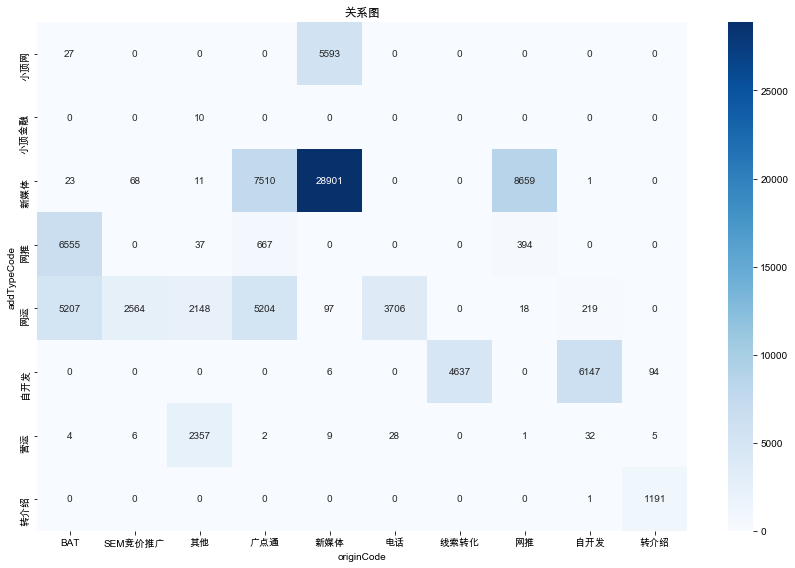

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(pd.crosstab(df['addTypeCode'],df['originCode']),cmap = 'Blues',annot = True,fmt='d',ax = ax)#如果是连续值会有很多列
ax.set_title('关系图')
fig.tight_layout()

# 柱状图

跟进             26917
剔除审核超时掉库       20628
剔除审核通过         19003
签单              4742
超期未跟进掉库         3738
剔除待审核           3235
同意返无效           2838
未连跟掉库           2247
拨打隐藏            1796
拾回自跟进           1602
智能推送            1548
剔除              1435
指定天数未签单掉库        658
移交超时跟进掉库         594
同意剔除             298
移交商务             257
返无效驳回超期跟进掉库      219
自开发新增            178
隐藏到期              78
电销客户共享库拾回         44
离职移交超时掉库          28
隐藏                25
电销超时分配掉库           8
拾回重分               8
资源端剔除              7
驳回返无效              4
空号错号返无效            3
质检分配               1
未首电掉库              1
返无效                1
Name: businessOperate, dtype: int64
1.0    54322
2.0    37808
Name: uploadType, dtype: int64
个人库     38161
隐藏库     22985
废弃库     14804
事业部库    13196
公海库      1874
无效库      1082
剔除库        13
部门库        10
经理库         8
资源库         8
Name: businessLocation, dtype: int64
移交                31534
拾回                30133
资源端分配             13927
抢单                 6811
自主开发

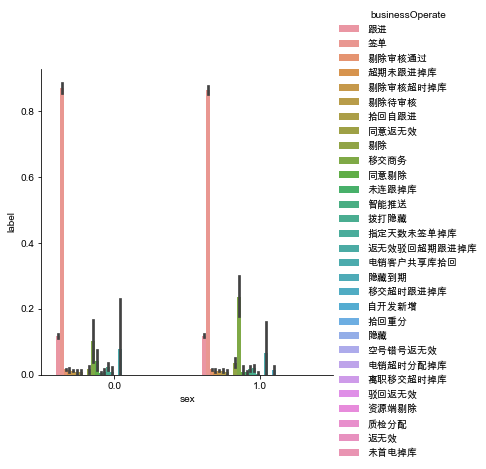

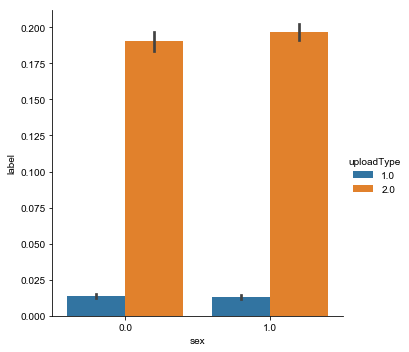

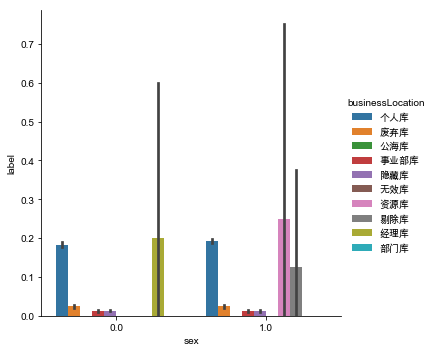

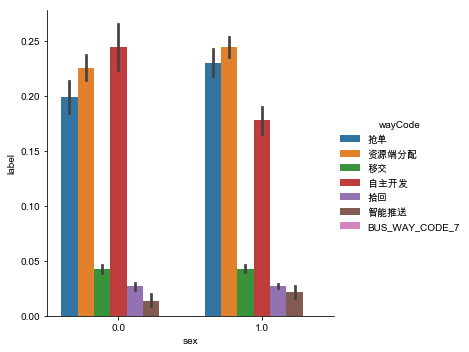

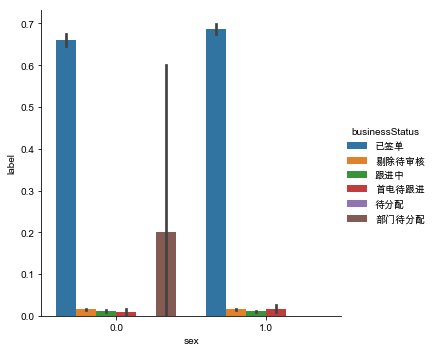

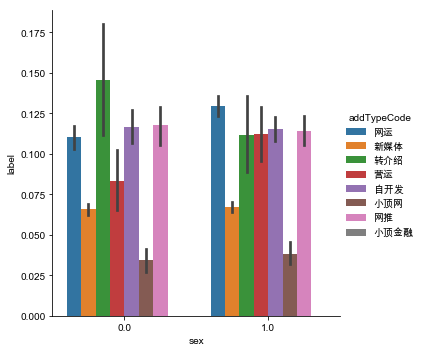

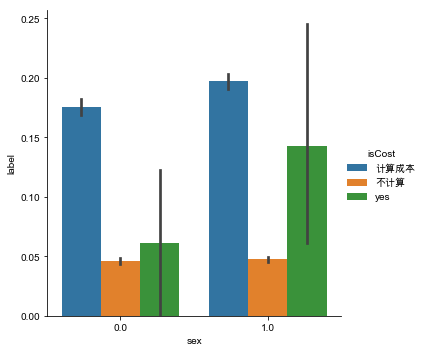

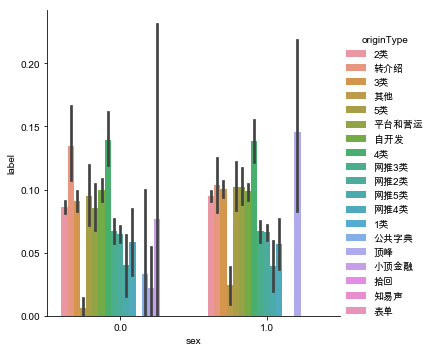

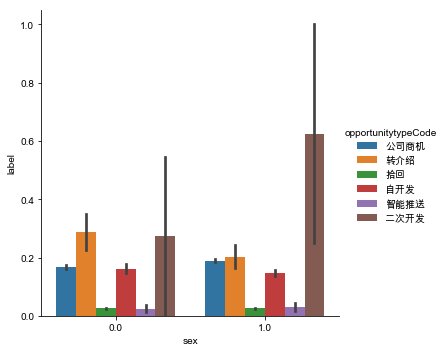

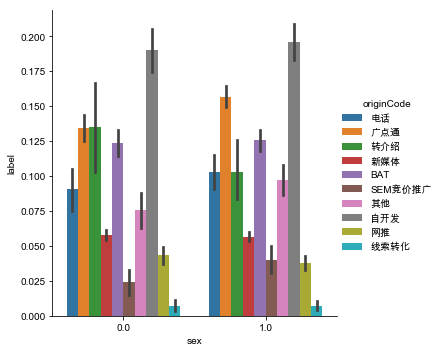

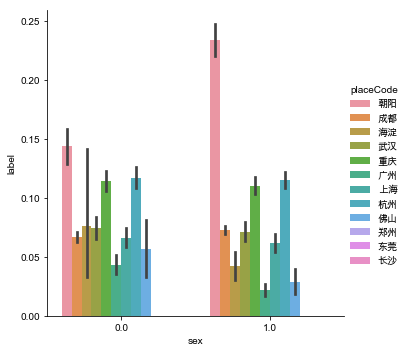

In [14]:
for name in df.columns:
    if name not in ['login_name','customer_id','label', 'sex']:
        print(df[name].value_counts())
        sns.catplot(x="sex", y="label", hue=name, kind="bar", data=df)

In [15]:
for name in df.columns:
    if name not in ['login_name','customer_id','label']:
        print(df[name].value_counts())

跟进             26917
剔除审核超时掉库       20628
剔除审核通过         19003
签单              4742
超期未跟进掉库         3738
剔除待审核           3235
同意返无效           2838
未连跟掉库           2247
拨打隐藏            1796
拾回自跟进           1602
智能推送            1548
剔除              1435
指定天数未签单掉库        658
移交超时跟进掉库         594
同意剔除             298
移交商务             257
返无效驳回超期跟进掉库      219
自开发新增            178
隐藏到期              78
电销客户共享库拾回         44
离职移交超时掉库          28
隐藏                25
电销超时分配掉库           8
拾回重分               8
资源端剔除              7
驳回返无效              4
空号错号返无效            3
质检分配               1
未首电掉库              1
返无效                1
Name: businessOperate, dtype: int64
1.0    54322
2.0    37808
Name: uploadType, dtype: int64
个人库     38161
隐藏库     22985
废弃库     14804
事业部库    13196
公海库      1874
无效库      1082
剔除库        13
部门库        10
经理库         8
资源库         8
Name: businessLocation, dtype: int64
移交                31534
拾回                30133
资源端分配             13927
抢单                 6811
自主开发

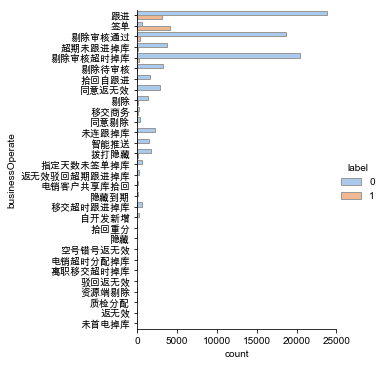

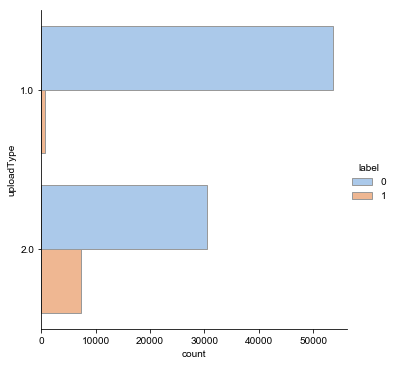

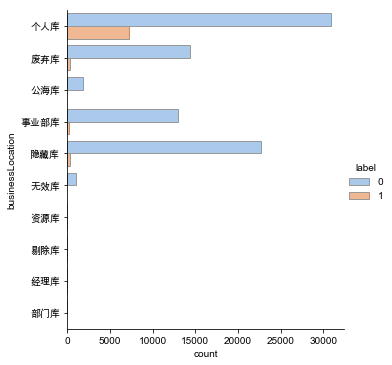

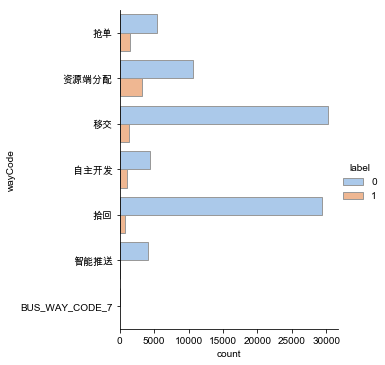

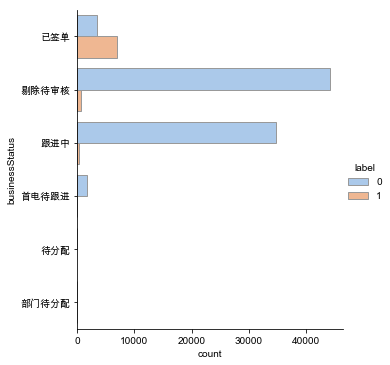

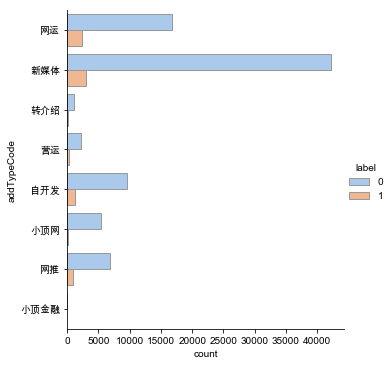

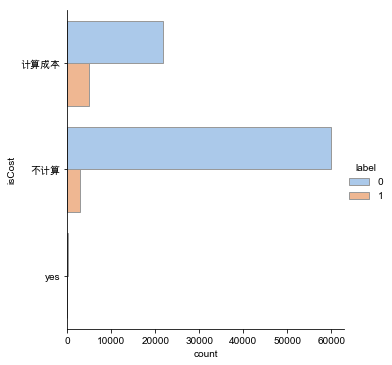

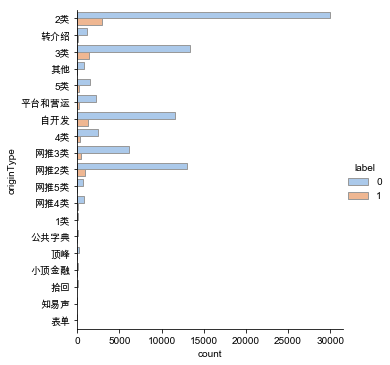

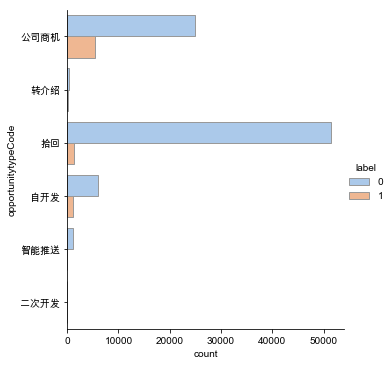

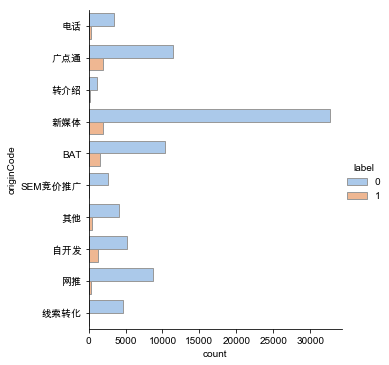

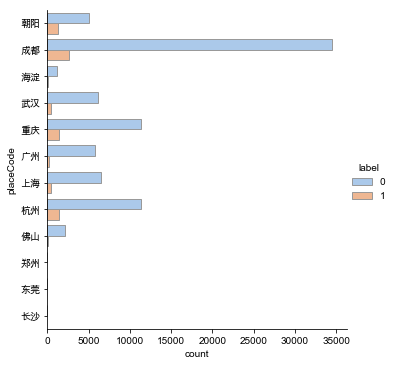

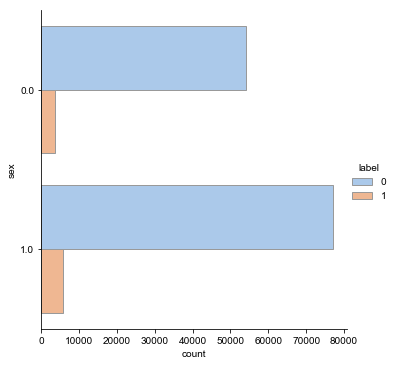

In [16]:
for name in df.columns:
    if name not in ['login_name','customer_id','label']:
        sns.catplot(y=name, hue="label", kind="count", palette="pastel", edgecolor=".6", data=df)

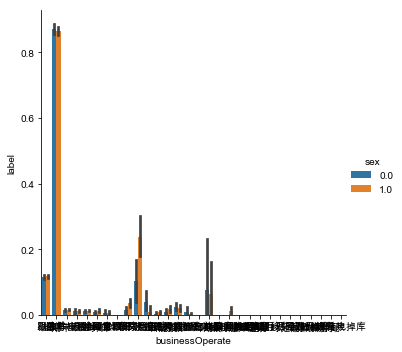

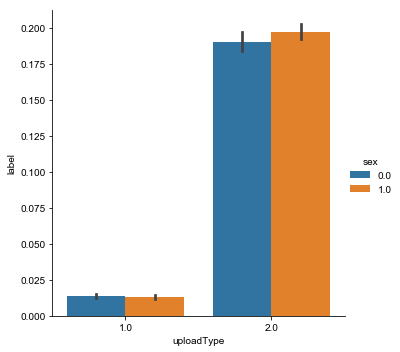

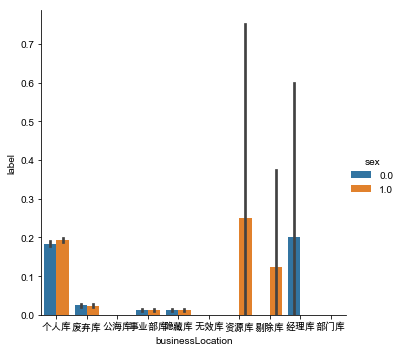

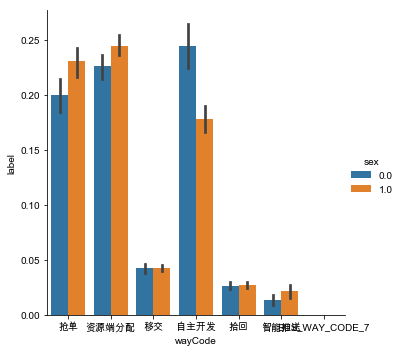

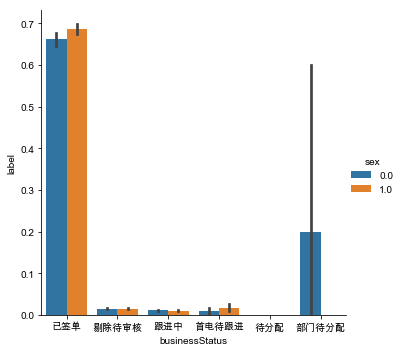

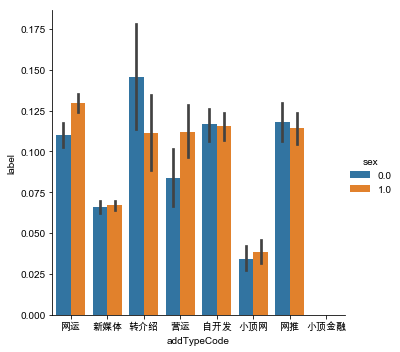

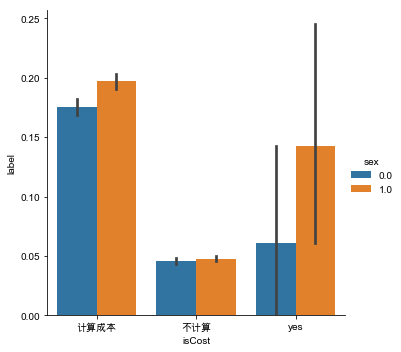

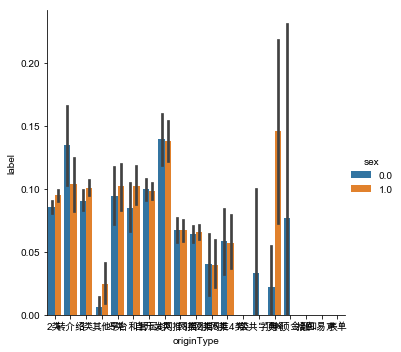

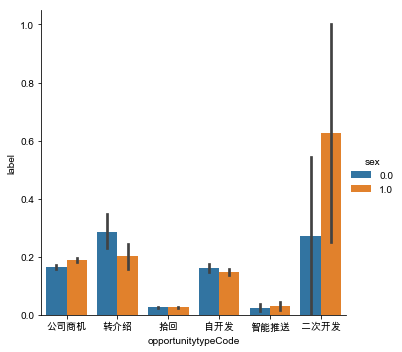

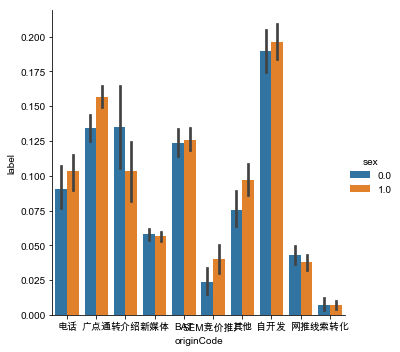

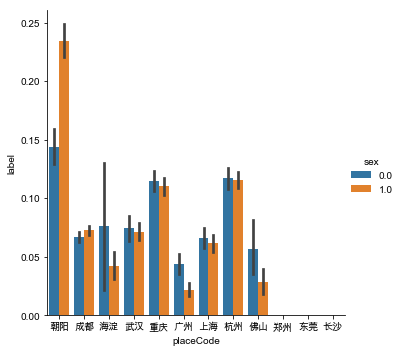

In [17]:
for name in df.columns:
    if name not in ['login_name','customer_id','label', 'sex']:
        sns.catplot(x=name, y="label", hue="sex", kind="bar", data=df)

# 划分训练集和测试集

In [25]:
for name in df.columns:
    df[name].fillna('其他', inplace=True)
    
df2 = df
# 下采样
df1 = df2[df2['label'] == 0]
print(df1.shape)

df2 = df2[df2['label'] == 1]
print(df2.shape)

df1 = df1.sample(n = len(df2)*2, replace = True)
print(df1.shape)

df1 = pd.concat([df1, df2], axis=0)
print(df1.shape)

df1 = df1.sample(frac = 1.0, replace = True) #打乱顺序
df1.drop(columns=['login_name', 'customer_id'], inplace=True)
print(df1.shape)

(92477, 15)
(8868, 15)
(17736, 15)
(26604, 15)
(26604, 13)


In [26]:
for column in df1.columns:
    if column == 'label':
        print('不能把label当做特征进行编码')
        continue 
    print(column)
    values = list(set(df1[column].values.tolist()))
    value_map = {values[i]:i+1 for i in range(len(values))}
    print(values)
    df1[column] = df1[column].map(value_map)
    values = list(set(df1[column].values.tolist()))
    print(values)

sex
[0.0, 1.0, '其他']
[1, 2, 3]
addTypeCode
['转介绍', '营运', '网推', '网运', '新媒体', '其他', '小顶网', '自开发']
[1, 2, 3, 4, 5, 6, 7, 8]
isCost
['计算成本', '其他', 'yes', '不计算']
[1, 2, 3, 4]
opportunitytypeCode
['转介绍', '公司商机', '智能推送', '拾回', '二次开发', '其他', '自开发']
[1, 2, 3, 4, 5, 6, 7]
businessStatus
['首电待跟进', '已签单', '剔除待审核', '其他', '跟进中']
[1, 2, 3, 4, 5]
placeCode
['重庆', '郑州', '海淀', '武汉', '上海', '广州', '佛山', '其他', '杭州', '成都', '朝阳']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
businessOperate
['拨打隐藏', '跟进', '自开发新增', '拾回自跟进', '未首电掉库', '超期未跟进掉库', '返无效驳回超期跟进掉库', '智能推送', '隐藏到期', '移交商务', '离职移交超时掉库', '指定天数未签单掉库', '移交超时跟进掉库', '其他', '电销客户共享库拾回', '未连跟掉库', '电销超时分配掉库', '签单', '同意返无效']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
不能把label当做特征进行编码
uploadType
[1.0, 2.0, '其他']
[1, 2, 3]
originType
['转介绍', '5类', '平台和营运', '顶峰', '小顶金融', '1类', '网推3类', '网推2类', '3类', '知易声', '其他', '4类', '2类', '自开发', '网推4类', '网推5类']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
wayCode
['资源端分配', '智能推送', '拾回', '抢单', '移交', '其他', '

In [27]:
from loans_drop.offline.lgb_train import LightGBM
model = LightGBM(dataframe=df1)
model.train(save_path=config_path+'lianxu.pk')

/Users/luocheng/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/luocheng/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. 

train.label.value_counts: (18622, 13)
0    12394
1     6228
Name: label, dtype: int64
test.label.value_counts: (7982, 13)
0    5346
1    2636
Name: label, dtype: int64
数据拆分
训练集
验证集
测试集
Start training LightGBM...
[1]	valid_0's binary_logloss: 0.62781
[2]	valid_0's binary_logloss: 0.623084
[3]	valid_0's binary_logloss: 0.618258
[4]	valid_0's binary_logloss: 0.613711
[5]	valid_0's binary_logloss: 0.607973
[6]	valid_0's binary_logloss: 0.602399
[7]	valid_0's binary_logloss: 0.598101
[8]	valid_0's binary_logloss: 0.600027
[9]	valid_0's binary_logloss: 0.594579
[10]	valid_0's binary_logloss: 0.590358
[11]	valid_0's binary_logloss: 0.586311
[12]	valid_0's binary_logloss: 0.58809
[13]	valid_0's binary_logloss: 0.582905
[14]	valid_0's binary_logloss: 0.579677
[15]	valid_0's binary_logloss: 0.576184
[16]	valid_0's binary_logloss: 0.572466
[17]	valid_0's binary_logloss: 0.567675
[18]	valid_0's binary_logloss: 0.564718
[19]	valid_0's binary_logloss: 0.560055
[20]	valid_0's binary_logloss: 0.555374

[203]	valid_0's binary_logloss: 0.437905
[204]	valid_0's binary_logloss: 0.43892
[205]	valid_0's binary_logloss: 0.440727
[206]	valid_0's binary_logloss: 0.438296
[207]	valid_0's binary_logloss: 0.439312
[208]	valid_0's binary_logloss: 0.436941
[209]	valid_0's binary_logloss: 0.438127
[210]	valid_0's binary_logloss: 0.439128
[211]	valid_0's binary_logloss: 0.440177
[212]	valid_0's binary_logloss: 0.43838
[213]	valid_0's binary_logloss: 0.43602
[214]	valid_0's binary_logloss: 0.433693
[215]	valid_0's binary_logloss: 0.431409
[216]	valid_0's binary_logloss: 0.432537
[217]	valid_0's binary_logloss: 0.430341
[218]	valid_0's binary_logloss: 0.428114
[219]	valid_0's binary_logloss: 0.429723
[220]	valid_0's binary_logloss: 0.427483
[221]	valid_0's binary_logloss: 0.428657
[222]	valid_0's binary_logloss: 0.426919
[223]	valid_0's binary_logloss: 0.425581
[224]	valid_0's binary_logloss: 0.42683
[225]	valid_0's binary_logloss: 0.428108
[226]	valid_0's binary_logloss: 0.42906
[227]	valid_0's binar

[408]	valid_0's binary_logloss: 0.351712
[409]	valid_0's binary_logloss: 0.35057
[410]	valid_0's binary_logloss: 0.349434
[411]	valid_0's binary_logloss: 0.34864
[412]	valid_0's binary_logloss: 0.34927
[413]	valid_0's binary_logloss: 0.349897
[414]	valid_0's binary_logloss: 0.348839
[415]	valid_0's binary_logloss: 0.348382
[416]	valid_0's binary_logloss: 0.347336
[417]	valid_0's binary_logloss: 0.34803
[418]	valid_0's binary_logloss: 0.348703
[419]	valid_0's binary_logloss: 0.347637
[420]	valid_0's binary_logloss: 0.348264
[421]	valid_0's binary_logloss: 0.347145
[422]	valid_0's binary_logloss: 0.346381
[423]	valid_0's binary_logloss: 0.345653
[424]	valid_0's binary_logloss: 0.34465
[425]	valid_0's binary_logloss: 0.345276
[426]	valid_0's binary_logloss: 0.344799
[427]	valid_0's binary_logloss: 0.343821
[428]	valid_0's binary_logloss: 0.344434
[429]	valid_0's binary_logloss: 0.343703
[430]	valid_0's binary_logloss: 0.34445
[431]	valid_0's binary_logloss: 0.343446
[432]	valid_0's binary

[611]	valid_0's binary_logloss: 0.320044
[612]	valid_0's binary_logloss: 0.319358
[613]	valid_0's binary_logloss: 0.319725
[614]	valid_0's binary_logloss: 0.319278
[615]	valid_0's binary_logloss: 0.318828
[616]	valid_0's binary_logloss: 0.31843
[617]	valid_0's binary_logloss: 0.318784
[618]	valid_0's binary_logloss: 0.318506
[619]	valid_0's binary_logloss: 0.318193
[620]	valid_0's binary_logloss: 0.31753
[621]	valid_0's binary_logloss: 0.317826
[622]	valid_0's binary_logloss: 0.318233
[623]	valid_0's binary_logloss: 0.317586
[624]	valid_0's binary_logloss: 0.317892
[625]	valid_0's binary_logloss: 0.317496
[626]	valid_0's binary_logloss: 0.316818
[627]	valid_0's binary_logloss: 0.316181
[628]	valid_0's binary_logloss: 0.315797
[629]	valid_0's binary_logloss: 0.316121
[630]	valid_0's binary_logloss: 0.316464
[631]	valid_0's binary_logloss: 0.315836
[632]	valid_0's binary_logloss: 0.315528
[633]	valid_0's binary_logloss: 0.31585
[634]	valid_0's binary_logloss: 0.316174
[635]	valid_0's bin

[813]	valid_0's binary_logloss: 0.301584
[814]	valid_0's binary_logloss: 0.301783
[815]	valid_0's binary_logloss: 0.301334
[816]	valid_0's binary_logloss: 0.300911
[817]	valid_0's binary_logloss: 0.301088
[818]	valid_0's binary_logloss: 0.300679
[819]	valid_0's binary_logloss: 0.300866
[820]	valid_0's binary_logloss: 0.301091
[821]	valid_0's binary_logloss: 0.300675
[822]	valid_0's binary_logloss: 0.30087
[823]	valid_0's binary_logloss: 0.300454
[824]	valid_0's binary_logloss: 0.300208
[825]	valid_0's binary_logloss: 0.299762
[826]	valid_0's binary_logloss: 0.29996
[827]	valid_0's binary_logloss: 0.300174
[828]	valid_0's binary_logloss: 0.299937
[829]	valid_0's binary_logloss: 0.299539
[830]	valid_0's binary_logloss: 0.299121
[831]	valid_0's binary_logloss: 0.298685
[832]	valid_0's binary_logloss: 0.29826
[833]	valid_0's binary_logloss: 0.29787
[834]	valid_0's binary_logloss: 0.298041
[835]	valid_0's binary_logloss: 0.2982
[836]	valid_0's binary_logloss: 0.297782
[837]	valid_0's binary

In [18]:
# Function to analysis label describe
def label_analysis(data,label_name=None,feature_name=[]):
    print('LABEL CATEGORY Analysis')
    count_label = pd.DataFrame(data[label_name].value_counts()).reset_index()
    count_label.columns = ['cate','total']
    print(count_label)
    try:
        data[label_name].astype(int).plot.hist()
        plt.show()
    except:
        data[label_name].fillna(-1).astype(int).plot.hist()
        plt.show()
    # Describe 01
    if len(feature_name)==0:
        feature_name = [i for i in data.columns if i not in [label_name,]]
    print('Want To Watch: ',len(feature_name))
    print(feature_name)
    print('Describe in each columns: ')
    for i in count_label['cate'].values:
        print('Cate: ',i)
        print(data[data[label_name].astype(int)==i][feature_name].describe())

    print('CALC CORR')
    correlations = data.corr()[label_name].sort_values()
    print('Most Positive Correlations:\n', correlations.tail(15))
    print('\nMost Negative Correlations:\n', correlations.head(15))
    return correlations

LABEL CATEGORY Analysis
   cate   total
0     0  136436
1     1    9515


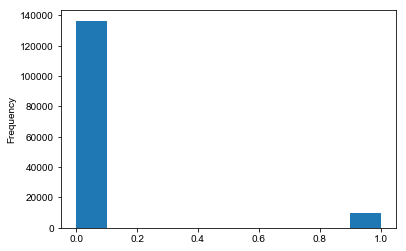

Want To Watch:  14
['businessOperate', 'customer_id', 'uploadType', 'businessLocation', 'wayCode', 'businessStatus', 'addTypeCode', 'isCost', 'originType', 'opportunitytypeCode', 'originCode', 'login_name', 'placeCode', 'sex']
Describe in each columns: 
Cate:  0
        customer_id    uploadType    login_name            sex
count  1.364360e+05  84030.000000  1.364360e+05  131054.000000
mean   6.246098e+18      1.362275  1.286899e+08       0.587376
std    3.098824e+18      0.480661  3.048736e+08       0.492308
min    2.900000e+01      1.000000  1.000660e+05       0.000000
25%    7.696188e+18      1.000000  1.031590e+05       0.000000
50%    7.788218e+18      1.000000  1.049620e+05       1.000000
75%    7.816841e+18      2.000000  5.309316e+07       1.000000
max    7.829685e+18      2.000000  9.993303e+08       1.000000
Cate:  1
        customer_id   uploadType    login_name          sex
count  9.515000e+03  8100.000000  9.515000e+03  9199.000000
mean   7.148298e+18     1.909383  1.76638

In [21]:
sample = label_analysis(df, label_name='label')

In [22]:
sample